#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [1]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [2]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [3]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,344911.0,339350.0,335350.0,333517.0,342000.0,356000.0,371000.0,380667.0,...,543333.0,528333.0,518333.0,515333.0,509500.0,510333.0,516667.0,535833.0,558333.0,579667.0
1,"Los Angeles, CA",CA,394000.0,397333.0,407333.0,430667.0,450667.0,465000.0,468333.0,471667.0,...,852000.0,840333.0,827000.0,818333.0,816667.0,827333.0,839000.0,854000.0,873333.0,888333.0
2,"Chicago, IL",IL,162833.0,158000.0,160218.0,170218.0,183385.0,197833.0,207500.0,212333.0,...,285000.0,278333.0,273333.0,270000.0,269000.0,275633.0,287300.0,300300.0,313167.0,319833.0
3,"Dallas, TX",TX,151667.0,152167.0,155333.0,164500.0,172800.0,178467.0,181633.0,181125.0,...,390500.0,382500.0,373333.0,363333.0,362333.0,367000.0,377000.0,384667.0,395000.0,400333.0
4,"Houston, TX",TX,149833.0,148572.0,150405.0,160155.0,167417.0,174900.0,177650.0,178650.0,...,321000.0,316000.0,310667.0,306000.0,304333.0,306333.0,313333.0,321667.0,328667.0,333667.0


In [4]:
df_states = df.drop(columns=["RegionName"])
df_states_gb = df_states.groupby("StateName").mean()
df_states_gb.head()
#df_states_gb.to_csv("df_states_gb.csv")

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
AL,139207.500000,136455.100000,137450.100000,143137.200000,150824.200000,152920.500000,156008.100000,154458.000000,165501.800000,162088.400000,...,224562.600000,222363.800000,218702.900000,215585.400000,215292.600000,219752.500000,225936.700000,231743.300000,236065.000000,241476.700000
AR,113140.500000,114328.250000,114876.375000,117305.750000,118360.500000,120959.000000,122664.250000,125274.000000,123174.125000,120270.750000,...,205190.250000,204173.125000,203160.625000,201094.000000,199447.750000,201185.250000,201170.875000,207448.000000,211662.500000,216482.500000
AZ,151945.333333,150320.333333,150731.888889,153111.555556,158783.777778,163719.444444,166756.666667,165846.333333,164592.111111,164959.666667,...,385012.222222,381314.222222,371600.222222,365123.222222,363447.222222,369987.888889,373992.555556,383427.888889,392433.333333,399531.555556
CA,257868.000000,258652.967742,262601.870968,276333.419355,289381.774194,297895.161290,300741.935484,302486.548387,303077.935484,304344.419355,...,594310.096774,586484.870968,575474.225806,563108.935484,557903.580645,566261.032258,580188.741935,596817.161290,606919.354839,614805.935484
CO,261803.000000,268980.428571,263938.857143,266736.714286,264705.142857,266670.642857,261371.785714,257221.142857,261678.000000,261086.642857,...,576136.071429,572578.500000,568419.571429,559916.642857,553392.071429,549631.571429,575710.714286,581235.785714,592245.285714,585315.571429


In [5]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
moving_avg_by_states_df = df_states_gb.rolling(window=12, axis=1, min_periods=1).mean()
moving_avg_by_states_df.head()
#moving_avg_by_states_df.to_csv("test_state.csv")

C:\Users\Saman\AppData\Local\Temp\ipykernel_36132\3669584775.py:2: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_by_states_df = df_states_gb.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
StateName,,,,,,,,,,,,,,,,,,,,,
AL,139207.500000,137831.300000,137704.233333,139062.475000,141414.820000,143332.433333,145143.242857,146307.587500,148440.277778,149805.090000,...,224513.200000,225275.191667,225474.425000,225460.075000,225391.775000,225546.391667,225610.008333,225514.008333,225428.941667,225933.041667
AR,113140.500000,113734.375000,114115.041667,114912.718750,115602.275000,116495.062500,117376.375000,118363.578125,118898.083333,119035.350000,...,199800.302083,201319.208333,202583.604167,203611.270833,204164.041667,204555.072917,204518.520833,204663.229167,204864.270833,205424.614583
AZ,151945.333333,151132.833333,150999.185185,151527.277778,152978.577778,154768.722222,156481.285714,157651.916667,158423.049383,159076.711111,...,383404.787037,385256.907407,385530.601852,384830.907407,383827.592593,383094.268519,382154.842593,381104.638889,380575.018519,380542.490741
CA,257868.000000,258260.483871,259707.612903,263864.064516,268967.606452,273788.865591,277639.304147,280745.209677,283226.623656,285338.403226,...,601628.975806,602762.349462,602901.325269,601984.107527,600140.056452,597551.145161,594290.440860,591416.784946,589177.142473,588298.115591
CO,261803.000000,265391.714286,264907.428571,265364.750000,265232.828571,265472.464286,264886.653061,263928.464286,263678.412698,263419.235714,...,560127.476190,563869.125000,566989.142857,569640.154762,571618.166667,573018.113095,574698.488095,574347.452381,573616.107143,572600.755952


In [6]:
number_of_periods = len(moving_avg_by_states_df.columns)
#number_of_periods
growth_rate_ny_state = pd.DataFrame({
    "Growth Rate":((moving_avg_by_states_df["7/31/2023"] / 
                           moving_avg_by_states_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_states = growth_rate_ny_state["Growth Rate"].nlargest(3).index
bottom_3_states = growth_rate_ny_state["Growth Rate"].nsmallest(3).index

states_to_plot = [item for sublist in [top_3_states, bottom_3_states] for item in sublist]

#states_to_plot
#print(top_3_states)
#print(bottom_3_states)
#growth_rate_ny_state.head()

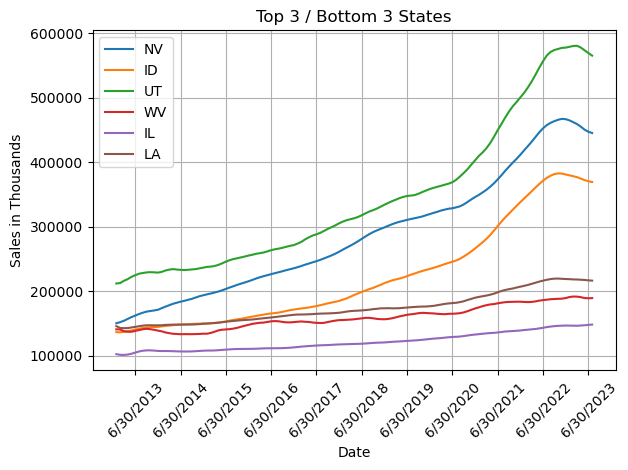

In [7]:
df_transposed = moving_avg_by_states_df.transpose()
#df_transposed = df_transposed.div(100)

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for state in states_to_plot:
    plt.plot(df_transposed.index, df_transposed[state], label=state)

plt.title("Top 3 / Bottom 3 States")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.savefig("Images/Moving Averages/States/12MMA_States_line.png")
plt.show()

In [8]:
number_of_periods = len(moving_avg_by_states_df.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((moving_avg_by_states_df["7/31/2023"] / 
                           moving_avg_by_states_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_cities = growth_rate_by_state["Growth Rate"].nlargest(3).index
bottom_3_cities = growth_rate_by_state["Growth Rate"].nsmallest(3).index
cities_to_plot = [item for sublist in [top_3_cities, bottom_3_cities] for item in sublist]

top_bottom_cities = pd.DataFrame({"RegionName":cities_to_plot}).set_index("RegionName")
cities_to_plot

['NV', 'ID', 'UT', 'WV', 'IL', 'LA']

In [9]:
top_bottom_states_combined = growth_rate_by_state.merge(moving_avg_by_states_df[["1/31/2013", "7/31/2023"]], on="StateName", how="left")
df_to_plot = top_bottom_states_combined[top_bottom_states_combined.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
df_to_plot

,Growth Rate,1/31/2013,7/31/2023
StateName,,,
ID,0.098638,136498.750000,369406.583333
IL,0.035631,102308.823529,148194.970588
LA,0.037988,145816.714286,216359.285714
NV,0.108118,150273.833333,445401.111111
UT,0.097170,211924.833333,565474.152778
WV,0.028345,140830.500000,189307.500000


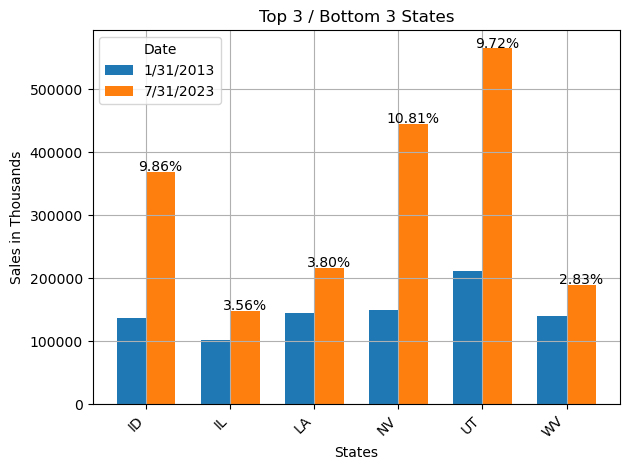

In [10]:
states = df_to_plot.index
values_1_31_2013 = df_to_plot["1/31/2013"]
values_7_31_2023 = df_to_plot["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(states))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, states, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = df_to_plot['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1000, f'{growth_rate:.2%}', ha="center")

plt.xlabel("States")
plt.ylabel("Sales in Thousands")
plt.title("Top 3 / Bottom 3 States")

plt.grid(True)
plt.legend(title="Date")
plt.tight_layout()
plt.savefig("Images/Moving Averages/States/Growth_States_bar.png")
plt.show()

In [11]:
state_results_df = top_bottom_states_combined
state_results_df = state_results_df.sort_values(by="Growth Rate", ascending=False)
state_results_df['Growth Rate'] = state_results_df['Growth Rate'].map('{:.2%}'.format)
state_results_df.head()

,Growth Rate,1/31/2013,7/31/2023
StateName,,,
NV,10.81%,150273.833333,445401.111111
ID,9.86%,136498.750000,369406.583333
UT,9.72%,211924.833333,565474.152778
FL,9.20%,143926.375000,365143.177083
MT,9.07%,180216.500000,451812.541667


In [14]:
pd.options.display.float_format = '{:,.0f}'.format
state_results_df['1/31/2013'] = state_results_df['1/31/2013'].round().astype(float)
state_results_df['7/31/2023'] = state_results_df['7/31/2023'].round().astype(float)
state_results_df["Change"] = state_results_df['7/31/2023'] - state_results_df['1/31/2013']
state_results_df.tail()

,Growth Rate,1/31/2013,7/31/2023,Change
StateName,,,,
NJ,4.13%,"225,042","345,524","120,482"
CT,4.04%,"230,396","350,504","120,108"
LA,3.80%,"145,817","216,359","70,542"
IL,3.56%,"102,309","148,195","45,886"
WV,2.83%,"140,830","189,308","48,478"


In [17]:
state_results_df.to_csv("By State Changes.csv")